In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler

In [ ]:
stockStartDate = '2012-05-18'
#today = datetime.today().strftime('%Y-%m-%d')

end ='2020-04-29'

data = web.DataReader('RELIANCE', data_source='nse',start = stockStartDate, end=end)

NotImplementedError: ignored

In [ ]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,28.180000,27.420000,27.440001,28.000000,69846400,28.000000
2013-01-03,28.469999,27.590000,27.879999,27.770000,63140600,27.770000
2013-01-04,28.930000,27.830000,28.010000,28.760000,72715400,28.760000
2013-01-07,29.790001,28.650000,28.690001,29.420000,83781800,29.420000
2013-01-08,29.600000,28.860001,29.510000,29.059999,45871300,29.059999
...,...,...,...,...,...,...
2020-08-03,255.399994,250.330002,252.649994,251.960007,23124900,251.960007
2020-08-04,252.800003,247.429993,251.559998,249.830002,17183500,249.830002
2020-08-05,252.270004,247.770004,250.190002,249.119995,13088400,249.119995


In [ ]:
data.isna().any()


High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

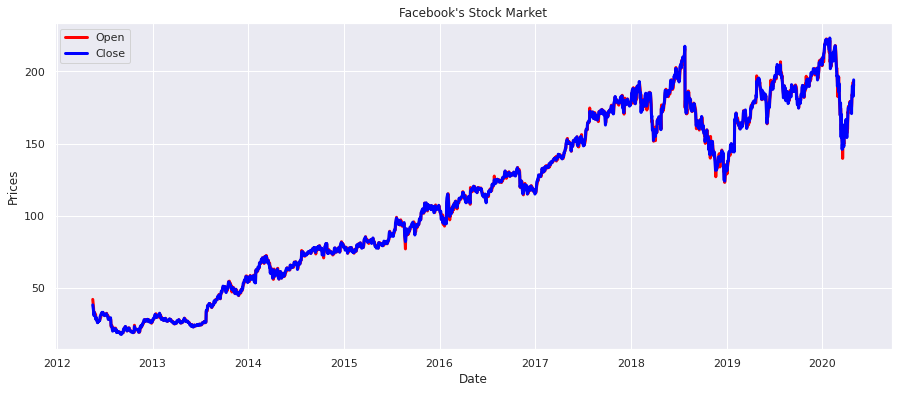

In [ ]:

# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['Open'], label='Open', linewidth=3, color='red')
plt.plot(data['Close'], label='Close', linewidth=3, color='blue')

plt.legend()
plt.show()

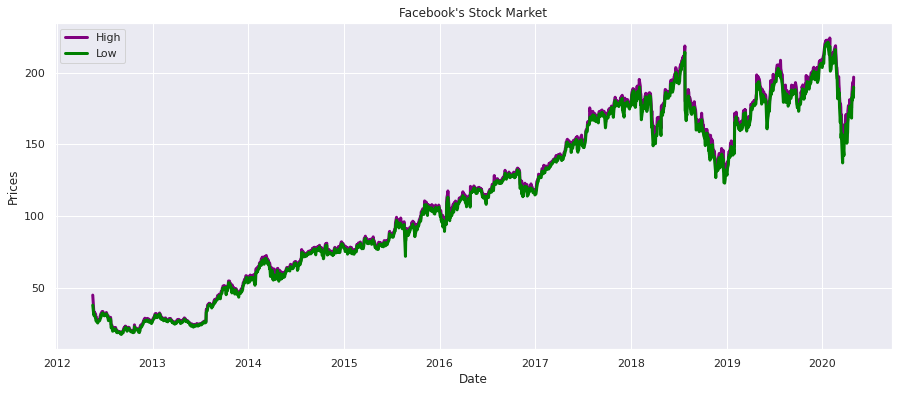

In [ ]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['High'], label='High', linewidth=3, color='purple')
plt.plot(data['Low'], label='Low', linewidth=3, color='green')

plt.legend()
plt.show()

In [ ]:
training_data = data[data.index < '2019-01-01']
testing_data = data[data.index >= '2019-01-01']

testing_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...
2020-04-23,187.050003,183.149994,184.080002,185.130005,21426600,185.130005
2020-04-24,190.410004,180.830002,183.229996,190.070007,28868500,190.070007
2020-04-27,193.750000,187.410004,192.660004,187.500000,29197800,187.500000


In [ ]:
training_data = training_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
training_data

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200
...,...,...,...,...,...
2018-12-24,123.099998,129.740005,123.019997,124.059998,22066000
2018-12-26,126.000000,134.240005,125.889999,134.179993,39723400
2018-12-27,132.440002,134.990005,129.669998,134.520004,31202500


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)

scaled_training_data

array([[0.12128111, 0.13341652, 0.10395486, 0.10261801, 1.        ],
       [0.09335154, 0.09178937, 0.07853803, 0.08159383, 0.28587298],
       [0.07351751, 0.07646618, 0.06806629, 0.06642639, 0.16889149],
       ...,
       [0.57862782, 0.58258052, 0.56994711, 0.58462234, 0.04455   ],
       [0.59330093, 0.58722237, 0.58280803, 0.5780147 , 0.02944439],
       [0.5887978 , 0.58083355, 0.57137045, 0.56745255, 0.03296355]])

In [ ]:
X_train = []
y_train = []

for i in range(60, scaled_training_data.shape[0]-60):
    X_train.append(scaled_training_data[i-60:i])
    y_train.append(scaled_training_data[i,[0, 3]])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((1545, 60, 5), (1545, 2))

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()

# Adding the first LSTM layer & Dropout
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

# Adding the second LSTM layer & Dropout
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding the third LSTM layer & Dropout
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding the fourth LSTM layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding the fifth LSTM layer & Dropout
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the final Dense layer
model.add(Dense(units = 2))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
39/39 [==============================] - 4s 106ms/step - loss: 0.0147 - val_loss: 0.0119
Epoch 2/100
39/39 [==============================] - 3s 81ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 3/100
39/39 [==============================] - 3s 81ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 4/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 5/100
39/39 [==============================] - 3s 78ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 6/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0022 - val_loss: 0.0058
Epoch 7/100
39/39 [==============================] - 3s 78ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 8/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 9/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 10/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0019 - val_loss: 0.005

In [ ]:
model.save('fb_stock_predictor')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fb_stock_predictor/assets


In [ ]:
testing_data = testing_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
testing_data

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,26263800
...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,29197800


In [ ]:
past_60_days_data = training_data.tail(60)

In [ ]:
new_testing_data = past_60_days_data.append(testing_data)
new_testing_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-04,161.460007,161.460007,157.350006,158.850006,25739600
2018-10-05,159.210007,160.899994,156.199997,157.330002,25744000
2018-10-08,155.539993,158.339996,154.389999,157.250000,24046000
2018-10-09,157.690002,160.589996,157.419998,157.899994,18844400
2018-10-10,156.820007,157.690002,151.309998,151.380005,30610000
...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,29197800


In [ ]:
scaled_testing_data = scaler.transform(new_testing_data)
scaled_testing_data

array([[0.72546046, 0.71469933, 0.71065475, 0.70641241, 0.03492651],
       [0.71407613, 0.71190415, 0.70480884, 0.69880363, 0.03493426],
       [0.69550694, 0.69912653, 0.69560795, 0.69840316, 0.03194305],
       ...,
       [0.88332323, 0.87586725, 0.86346076, 0.8498273 , 0.04101851],
       [0.86308441, 0.85315698, 0.8388064 , 0.8268509 , 0.02786493],
       [0.87456988, 0.89163967, 0.87662666, 0.88331583, 0.07053724]])

In [ ]:
X_test = []
y_test = []

for i in range(60, scaled_testing_data.shape[0]):
    X_test.append(scaled_testing_data[i-60:i])
    y_test.append(scaled_testing_data[i,[0,3]])

In [ ]:

# Converting Lists Into Numpy Array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape

((334, 60, 5), (334, 2))

In [ ]:

# Evaluate The Model
loss = model.evaluate(X_test, y_test)
loss

11/11 [==============================] - 0s 17ms/step - loss: 0.0010


0.001004435122013092

In [ ]:

# Load The Model
model = keras.models.load_model('fb_stock_predictor')


In [ ]:

# Make Predictions
predictions = model.predict(X_test)

# Predictions

In [ ]:

# Find The Mean Squared Error
mean_error = mean_squared_error(y_test, predictions)

mean_error

0.0010044351102992022

In [ ]:
# Check Scale
scaler.scale_

array([5.05970448e-03, 4.99126542e-03, 5.08336709e-03, 5.00575661e-03,
       1.76160763e-09])

In [ ]:

scale_open = 1/5.05970449e-03
scale_close = 1/5.00575662e-03

# Unscaling The Predictions
predicted_open = predictions[:, 0]
predicted_close = predictions[:, 1]

predicted_open = predicted_open * scale_open
predicted_close = predicted_close * scale_close

In [ ]:
# Unscaling the y_test
actual_open = y_test[:, 0]
actual_close = y_test[:, 1]

actual_open = actual_open * scale_open
actual_close = actual_close * scale_close

In [ ]:

# Create The DataFrame For Actual_Open VS Predicted_Open
new_open_df = pd.DataFrame({"Actual Open": actual_open, "Predicted Open": predicted_open})

new_open_df

,Actual Open,Predicted Open
0,110.910005,116.833160
1,116.610002,117.163208
2,115.929994,117.575523
3,119.479997,118.239983
4,121.809999,119.100182
...,...,...
329,166.000002,159.197876
330,165.149995,160.300201
331,174.580003,161.982315
332,170.580003,164.019699


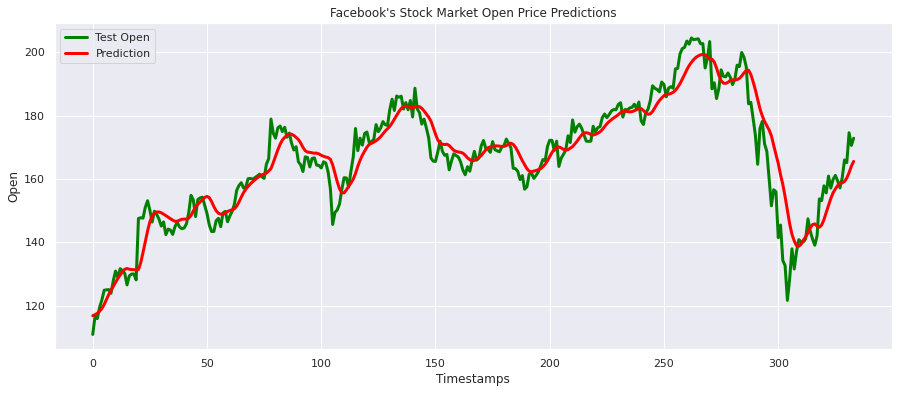

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market Open Price Predictions")
plt.xlabel('Timestamps')
plt.ylabel('Open')

plt.plot(new_open_df['Actual Open'], linewidth=3, color='green')
plt.plot(new_open_df['Predicted Open'], linewidth=3, color='red')

plt.legend(['Test Open', 'Prediction'], loc='upper left')
plt.savefig('facebook_stock_prediction_1.png', dpi=100)
plt.show()


In [ ]:

# Create The DataFrame For Actual_Close VS Predicted_Close
new_close_df = pd.DataFrame({"Actual Close": actual_close, "Predicted Close": predicted_close})

new_close_df

,Actual Close,Predicted Close
0,117.949993,117.075554
1,114.010006,117.426834
2,120.219997,117.852173
3,120.320003,118.523376
4,124.799999,119.385811
...,...,...
329,167.400005,159.290054
330,172.340007,160.388321
331,169.770000,162.067947
332,165.180004,164.099380


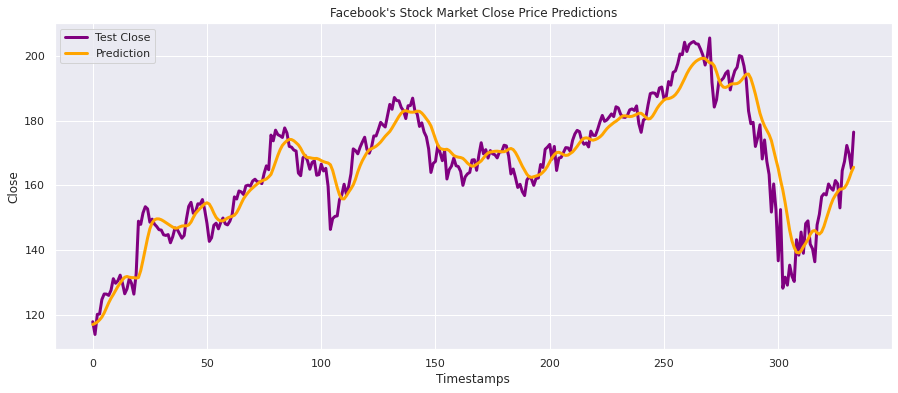

In [ ]:
# Visualizing The Open Prices
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market Close Price Predictions")
plt.xlabel('Timestamps')
plt.ylabel('Close')

plt.plot(new_close_df['Actual Close'], linewidth=3, color='purple')
plt.plot(new_close_df['Predicted Close'], linewidth=3, color='orange')

plt.legend(['Test Close', 'Prediction'], loc='upper left')
plt.savefig('facebook_stock_prediction_2.png', dpi=100)
plt.show()